# 2->RandomForestClassifier algorithm implementation

# RFC for holdout cross validation with Randon Over Sampling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Heart Disease.csv')
df.shape

(319795, 18)

# Removing Duplicate value

In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df.shape

(301717, 18)

In [5]:
df.HeartDisease.value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

# Encoding The DataSet with LabelEncoder

In [6]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [7]:
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column]=label.fit_transform(df[column])

# Separting x and y

In [8]:
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [9]:
x

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7,0,1,1,8,3,2,0,1,6,1,0,0
319791,29.84,1,0,0,0,0,0,1,3,3,0,1,4,5,1,0,0
319792,24.24,0,0,0,0,0,0,0,5,3,0,1,2,6,0,0,0
319793,32.81,0,0,0,0,0,0,0,1,3,0,0,2,12,0,0,0


In [10]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 301717, dtype: int32

# Imbalance Data handling

In [11]:
df.HeartDisease.value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

In [12]:
not_HeartDisease=(274456/(274456+27261))*100
HeartDisease=(27261/(274456+27261))*100

In [13]:
print('No HeartDisease {} percent of the total people'.format(not_HeartDisease))

No HeartDisease 90.96471196518591 percent of the total people


In [14]:
print('HeartDisease {} percent of the total people'.format(HeartDisease))

HeartDisease 9.03528803481408 percent of the total people


In [15]:
HeartDisease_no=df[df['HeartDisease']==0]
HeartDisease_yes=df[df['HeartDisease']==1]

In [16]:
HeartDisease_no.shape

(274456, 18)

In [17]:
HeartDisease_yes.shape

(27261, 18)

# So we have to balance our dataset . Now applying Random over sampling techniques


# Over sampling

In [18]:
from imblearn.over_sampling import RandomOverSampler
random_over_sampler = RandomOverSampler(random_state =100)

In [19]:
x_new,y_new=random_over_sampler.fit_resample(x,y)


In [20]:
x1_new=x2_new=x3_new=x4_new=x5_new=x6_new=x7_new=x8_new=x9_new=x_new
x_new


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548907,35.43,0,0,0,0,0,0,0,12,5,0,1,4,5,0,0,1
548908,23.01,1,0,0,0,20,0,1,8,5,0,1,4,6,0,0,0
548909,30.80,0,0,0,0,0,0,0,10,4,2,0,2,5,0,0,0
548910,44.63,0,0,0,0,7,1,0,9,2,2,0,2,8,0,0,0


In [21]:
y1_new=y2_new=y3_new=y4_new=y5_new=y6_new=y7_new=y8_new=y9_new=y_new

In [22]:
y_new

0         0
1         0
2         0
3         0
4         0
         ..
548907    1
548908    1
548909    1
548910    1
548911    1
Name: HeartDisease, Length: 548912, dtype: int32

In [23]:
x_new.shape

(548912, 17)

In [24]:
y_new.shape

(548912,)

# 2->RandomForestClassifier algorithm implementation


# RFC for holdout cross validation with Randon Over Sampling


In [25]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()  

In [26]:
over_xtrain,over_xtest,over_ytrain,over_ytest = train_test_split(x1_new,y1_new,test_size = 0.30 ,random_state =42)
rfc.fit(over_xtrain,over_ytrain)

RandomForestClassifier()

In [27]:
OverSampleing_dataset_accuracy1 = rfc.score(over_xtest,over_ytest)
OverSampleing_dataset_accuracy1

0.9640016031674703

# RFC for KFold Cross Validation with Random Over sampling


In [28]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits = 10)

In [29]:
OverSampleingDataset_kfold_result1 = cross_val_score(rfc,x1_new,y1_new,cv = kfold)
OverSampleingDataset_kfold_result1                  

array([0.94137579, 0.93908038, 0.94095571, 0.94700406, 0.94722268,
       0.97502323, 1.        , 1.        , 1.        , 1.        ])

In [30]:
OverSampleingDataset_kfold_result1.mean()

0.9690661848824608

# RFC for StratiFied KFold cross validation for Random over sampling

In [31]:
from sklearn.model_selection import StratifiedKFold
Stf_Kfold = StratifiedKFold(n_splits = 10)

In [32]:
OverSampleingDataset_Sf_kfold_result1 = cross_val_score(rfc,x1_new,y1_new,cv = Stf_Kfold)
OverSampleingDataset_Sf_kfold_result1

array([0.97168986, 0.97101581, 0.96922993, 0.97085132, 0.97276421,
       0.9691024 , 0.97593412, 0.96974003, 0.97485927, 0.97320144])

In [33]:
OverSampleingDataset_Sf_kfold_result1.mean()

0.9718388393257973

# Model Evaluating performance of confusion Matrix

In [34]:
pred_y1=rfc.predict(over_xtest)#Predicted Class 
pred_y1

array([1, 1, 0, ..., 1, 1, 0])

In [35]:
np.array(over_ytest) #actual class/y

array([1, 1, 0, ..., 1, 1, 0])

In [37]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_roc_curve
print(classification_report(over_ytest,pred_y1))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96     82143
           1       0.93      1.00      0.97     82531

    accuracy                           0.96    164674
   macro avg       0.97      0.96      0.96    164674
weighted avg       0.97      0.96      0.96    164674



In [38]:
cm1=confusion_matrix(over_ytest,pred_y1)
cm1

array([[76289,  5854],
       [   74, 82457]], dtype=int64)

# Visualization with heatmap performance of confussion matrix for RFC


Text(33.0, 0.5, 'Actual Values')

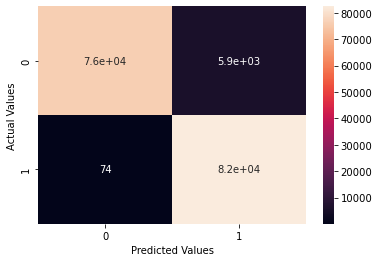

In [39]:
sns.heatmap(cm1,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')


In [40]:
tp,fn,fp,tn=confusion_matrix(over_ytest,pred_y1).reshape(-1)

In [41]:
tp

76289

In [42]:
fn

5854

In [43]:
fp

74

In [44]:
tn

82457

# Accuracy


In [45]:
(tp+tn)/(tp+fn+fp+tn)

0.9640016031674703

In [46]:
#precision
ppv = tp/(tp+fp)
print(ppv)

0.9990309443054882


In [47]:
#Recall
trp = tp/(tp+fn)
print(trp)

0.9287340369842835


In [48]:
#1-Specificity
fpr = fp/(fp+tn)
print(fpr)

0.0008966327804097854


In [49]:
#F1-score
f1_score = (2*ppv*trp)/(ppv+trp)
print(f1_score)

0.9626007848283346


In [50]:
#Specificity
tnr = tn/(tn+fp)
print(tnr)

0.9991033672195903


In [51]:
#CSI
csi = tp/(tp+fn+fp)
print(csi)

0.92789812325918


In [52]:
#FDR
fdr = fp/(tp+fp)
print(fdr)

0.00096905569451174


# Roc and Auc curve for Random Forest classifier


C:\Users\WIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


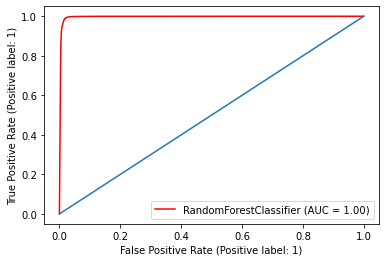

In [53]:
plot_roc_curve(rfc,over_xtest,over_ytest,color='red')
plt.plot([0,1],[0,1])

# Now Optimizing Random Forest Classifier Algorithm


# Tuning Random Forest Classifier using Randomized Search CV


In [54]:
from sklearn.model_selection import RandomizedSearchCV

# Assign Parameters

In [55]:
n_estimators=np.random.randint(15,200,20)
criterion=['gini','entropy']
max_features=['auto','sqrt','log2']
max_depth=np.random.randint(1,12,20)
min_samples_split=np.random.randint(1,12,15)

parameters={
    'n_estimators':n_estimators,
     'criterion':criterion,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [56]:
print(parameters)

{'n_estimators': array([ 83, 135,  70,  38,  64,  66, 107, 168,  22, 161, 116, 164, 122,
       111,  20,  28, 198, 150, 117,  36]), 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': array([ 6,  4,  2,  5, 10,  8,  1,  9,  3,  9,  8, 10,  5, 10,  2, 11,  7,
        4,  5,  6]), 'min_samples_split': array([10,  8,  7,  7,  9,  4,  8,  4,  3,  1,  9,  5, 11,  8, 11])}


In [57]:
import warnings
warnings.filterwarnings('ignore')
r=RandomizedSearchCV(rfc,parameters,n_iter=100,cv=3)
r.fit(over_xtrain,over_ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 6,  4,  2,  5, 10,  8,  1,  9,  3,  9,  8, 10,  5, 10,  2, 11,  7,
        4,  5,  6]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': array([10,  8,  7,  7,  9,  4,  8,  4,  3,  1,  9,  5, 11,  8, 11]),
                                        'n_estimators': array([ 83, 135,  70,  38,  64,  66, 107, 168,  22, 161, 116, 164, 122,
       111,  20,  28, 198, 150, 117,  36])})

In [58]:
r.cv_results_

{'mean_fit_time': array([ 0.29758827, 32.14595739, 50.57855058, 30.33507268, 67.16160647,
         6.39601922,  9.43865061, 25.3247331 , 60.45296144,  5.11798954,
         3.07850043, 39.33067838, 13.98481965, 33.19514521,  7.79747955,
        24.54971512, 11.64974078, 26.91326515,  7.77664558, 29.07041256,
         8.70429214, 15.85942809,  0.2619288 , 44.18053659, 51.63816595,
         0.27084637, 51.63780713,  8.04866203, 52.02150687,  4.76659449,
        77.07159503, 67.12941058, 27.43897986, 41.66455245, 25.97466954,
         7.68555077, 46.94439658, 44.35452811,  9.17779382,  0.25522733,
        28.65396277, 10.23516742, 10.83650128,  4.18782719, 77.49540194,
        40.49833155, 44.36705661,  9.16217017, 38.47963452, 14.82656535,
        38.03554956,  0.22396803, 38.68138258, 14.42820438, 15.55342555,
         0.22397765, 32.03338528, 25.16967265, 38.90778017, 39.22862212,
        16.26438419, 11.37042753, 15.47029066, 28.63941717, 57.85109719,
        47.56979243,  7.77664399, 

In [59]:
result=pd.DataFrame(r.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.297588,0.025021,0.000000,0.000000,164,1,log2,8,gini,"{'n_estimators': 164, 'min_samples_split': 1, ...",NaN,NaN,NaN,NaN,NaN,100
1,32.145957,1.553411,2.114751,0.130948,70,11,auto,11,gini,"{'n_estimators': 70, 'min_samples_split': 11, ...",0.770089,0.771610,0.771399,0.771033,0.000673,4
2,50.578551,4.220530,3.784627,0.938753,116,5,sqrt,9,gini,"{'n_estimators': 116, 'min_samples_split': 5, ...",0.762375,0.762896,0.763825,0.763032,0.000600,20
3,30.335073,2.709066,1.841711,0.040888,111,10,auto,5,gini,"{'n_estimators': 111, 'min_samples_split': 10,...",0.750945,0.750467,0.750474,0.750629,0.000224,67
4,67.161606,0.244718,4.294593,0.259480,168,8,log2,9,entropy,"{'n_estimators': 168, 'min_samples_split': 8, ...",0.762250,0.762037,0.762475,0.762254,0.000179,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8.179131,0.275700,0.567753,0.007368,38,4,log2,4,gini,"{'n_estimators': 38, 'min_samples_split': 4, '...",0.746526,0.746937,0.743955,0.745806,0.001320,77
96,22.793816,0.078361,1.531159,0.150136,70,4,auto,7,gini,"{'n_estimators': 70, 'min_samples_split': 4, '...",0.756543,0.756057,0.758001,0.756867,0.000826,49
97,47.119402,0.498247,3.120038,0.233987,122,9,auto,9,gini,"{'n_estimators': 122, 'min_samples_split': 9, ...",0.761930,0.763099,0.763365,0.762798,0.000623,23
98,30.622434,0.430963,1.979321,0.041009,122,3,log2,5,gini,"{'n_estimators': 122, 'min_samples_split': 3, ...",0.751132,0.750490,0.751950,0.751191,0.000597,64


In [60]:
new_r=r.best_estimator_
new_r

RandomForestClassifier(max_depth=11, min_samples_split=4, n_estimators=22)

In [61]:
new_r.fit(over_xtrain,over_ytrain)

RandomForestClassifier(max_depth=11, min_samples_split=4, n_estimators=22)

In [62]:
new_r.score(over_xtrain,over_ytrain)

0.7758784919763272